# <span style="color:#4682B4">  Data Cleaning </span>

### <span style="color:#00008B"> Load Libraries </span>

In [27]:
import pandas as pd
import numpy as np

#importing liabraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline


In [119]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## <span style="color:#00008B"> Data Understanding </span>



- user_agent: device, os system, etc. used by customer
- referred_to_url: site for touchpoint
- created_at: reference date
- visitor_source: channel source
- conv_#_life: # stage of funnel (#1 is PRIMARY RESPONSE LABEL)
- conv_#_life_date: date of conversion
- exit_survey_source_category: exit survey response for source
- exit_survey_submitted_product: exit survey product type
- exit_survey_source: exit source detailed response from source_category
- product_visited: product associated with referral site

    Load the data into a dataframe

In [6]:
data_file = '../data/data_mta_mta_data_000000000001.csv'
df = pd.read_csv(data_file)

In [8]:
#number of observations and features

print("Data Shape")
print("----------")
print("Number of columns:", df.shape[1])
print("Number of observations:", df.shape[0])

df.head(5)

Data Shape
----------
Number of columns: 15
Number of observations: 2661982


,user_analytics_id,user_agent,referred_to_url,created_at,visitor_source,conv_1_life,conv_1_life_date,conv_2_life,conv_2_life_date,conv_3_life,conv_3_life_date,exit_survey_source_category,exit_survey_submitted_product,exit_survey_source,product_visited
0,170bc53eb46b4e59a2f321bda584e9b8,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...,/taxes/guide-to-gift-tax/,2020-10-08 13:41:43 UTC,Organic - SEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
1,bfdbb9389e6b4a0791b160de3bf38414,Mozilla/5.0 (Linux; Android 10; M2006C3MG) App...,/blog/money-themed-baby-names/,2020-10-08 10:36:07 UTC,Organic - SEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
2,9a3d7aa449b548b88b724ee74cdf4dfa,Mozilla/5.0 (Linux; Android 8.1.0; SM-T580) Ap...,/blog/state-by-state-guide-to-workers-compensa...,2020-10-08 11:03:46 UTC,Organic - SEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
3,d7a57b15d3f2426197b7e802e445ab09,Mozilla/5.0 (Linux; Android 10; SM-G973U) Appl...,/disability-insurance/what-to-know-about-disab...,2020-10-08 11:50:48 UTC,Organic - SEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
4,03bc72cf09ab4a02940b153ac9541458,Mozilla/5.0 (compatible; parse.ly scraper/0.16...,/policy-center/secure-files,2020-10-08 17:32:21 UTC,Organic - SEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other


## <span style="color:#00008B"> Data Preprocessing & Analysis </span>


## <span style="color:#4682B4">  Data Analysis </span>

We have to make sure the data is suitable and well prepared for any analysis or model we want to use it for.

- **Print a concise summary of a DataFrame**
      
    This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [9]:
#Segregating the numeric and categorical variable names
numeric_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
print("There are %d numeric features and %d categorical features" %(len(numeric_var_names),len(catgorical_var_names)), "\n \n")


#checking for the data types and file size.
df.info(verbose=True)

There are 3 numeric features and 12 categorical features 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661982 entries, 0 to 2661981
Data columns (total 15 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   user_analytics_id              object 
 1   user_agent                     object 
 2   referred_to_url                object 
 3   created_at                     object 
 4   visitor_source                 object 
 5   conv_1_life                    float64
 6   conv_1_life_date               object 
 7   conv_2_life                    float64
 8   conv_2_life_date               object 
 9   conv_3_life                    float64
 10  conv_3_life_date               object 
 11  exit_survey_source_category    object 
 12  exit_survey_submitted_product  object 
 13  exit_survey_source             object 
 14  product_visited                object 
dtypes: float64(3), object(12)
memory usage: 304.6+ MB


### <span style="color:#4682B4">  Unique Values </span>
- **Check the unique values for each column**

Find out the columns that has too few/ too much unique data. Inspect these columns to decide whether to remove them or not


In [10]:
unique_rate = df.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) #unique rate and sort
unique_rate

created_at                       2465847
user_analytics_id                2302821
user_agent                        105949
referred_to_url                    98947
conv_1_life_date                   14299
conv_2_life_date                   10867
conv_3_life_date                    6634
exit_survey_source                   349
exit_survey_source_category           34
visitor_source                        24
exit_survey_submitted_product          5
product_visited                        4
conv_3_life                            2
conv_2_life                            2
conv_1_life                            2
dtype: int64

- **Inference**

Let us take a look at unique values for some column and the type of values contained in _ and _


In [7]:
def get_unique(unique_list,df):
    for var in unique_list:
        print(var,"  :  ",df[var].unique(),"\n")
        
unique_list = ['product_visited','exit_survey_submitted_product','visitor_source','exit_survey_source_category']
get_unique(unique_list,df)

product_visited   :   ['other' 'life' 'home' 'auto'] 

exit_survey_submitted_product   :   [nan 'life' 'Home and Auto' 'renters' 'disability'] 

visitor_source   :   ['Organic - SEO' 'Email' 'Influencer' 'Partnerships' 'Earned Media'
 'Direct' 'Paid Email' 'Paid Search - NB' 'Facebook' 'YouTube' 'Display'
 'Connected TV/TV' 'Paid Search - B' 'Blog' 'Organic - Brand' 'Lead Gen'
 'Referral' 'Gmail' 'Paid Social' 'Other' 'Native' 'Internal' 'Warm Lead'
 'Social'] 

exit_survey_source_category   :   [nan 'google_or_other_search_engine' 'mailer' 'online_article' 'other'
 'instagram' 'facebook' 'quora' 'email' 'pandora' 'podcast'
 'friend_family_co-worker_told_me_about_it' 'my_financial_advisor'
 'newsletters' 'tv_commercial' 'youtube' 'roku_apple_tv_etc'
 'billboard_or_outdoor_advertisement' 'radio' 'linkedin' 'twitter'
 'streeteasy' 'perkspot' 'gridwise' 'subway_ad' 'elevator_or_office_lobby'
 'search_engine' 'nextdoor' 'apple_news' 'ad_on_a_website' 'ad_online'
 'personal_referral' 'spoti

----

### <span style="color:#4682B4">  Null Values </span>

In [8]:
#Columns with Null Values
df.columns[df.isna().any()].tolist()

['user_agent',
 'referred_to_url',
 'conv_1_life',
 'conv_1_life_date',
 'conv_2_life',
 'conv_2_life_date',
 'conv_3_life',
 'conv_3_life_date',
 'exit_survey_source_category',
 'exit_survey_submitted_product',
 'exit_survey_source']

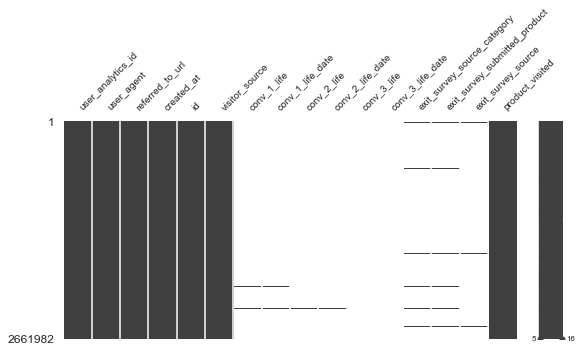

In [9]:
import missingno as msno 
msno.matrix(df, figsize=(9, 4),  fontsize=10) 

-----

### <span style="color:#4682B4">  Fill Null Values </span>

#### <span style="color:black">  conversion </span>

Conversion is a binary columns: 
- if the user has converted = 1
- if the user has not converted = 1

In [11]:
def replace_nan(df, col_list, fill_val):
    for var in col_list:
        df[var].fillna(fill_val, inplace=True)
        
col_list = ['conv_1_life','conv_2_life','conv_3_life']



replace_nan(df, col_list, fill_val = 0)

#### <span style="color:black">  referred_to_url </span>

In [12]:
df.head(1)

,user_analytics_id,user_agent,referred_to_url,created_at,visitor_source,conv_1_life,conv_1_life_date,conv_2_life,conv_2_life_date,conv_3_life,conv_3_life_date,exit_survey_source_category,exit_survey_submitted_product,exit_survey_source,product_visited
0,170bc53eb46b4e59a2f321bda584e9b8,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...,/taxes/guide-to-gift-tax/,2020-10-08 13:41:43 UTC,Organic - SEO,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,other


    Identify 'visitor_source' for which the referred to URL is null 

In [13]:
df[df['referred_to_url'].isnull()]['visitor_source'].unique()

array(['Direct', 'Warm Lead', 'Partnerships', 'Earned Media', 'Facebook',
       'Email', 'Blog', 'Organic - SEO'], dtype=object)

    URL is missing for many visitor_sources.

In [14]:
df[df['visitor_source'] == 'Direct']['referred_to_url'].unique()

array([nan, '/'], dtype=object)

In [15]:
df[df['visitor_source'] == 'Warm Lead']['referred_to_url'].unique()

array([nan], dtype=object)

Inference: For a user with visitor source 'Direct', we can notice that referred to URL is '/' 

Fill nan values in referred_to_url as following
1. referred_to_url == Direct when visitor_source == '/'
2. referred_to_url == unknown for any other nan/missing values

In [16]:
df.loc[df.visitor_source == 'Direct','referred_to_url'] = '/'

In [17]:
df['referred_to_url'].fillna('unknown', inplace=True)

#### <span style="color:black">  user_agent </span>

In [18]:
df['user_agent'].fillna('unknown', inplace=True)

##### <span style="color:black">  exit_survey_source_category | exit_survey_submitted_product | exit_survey_source </span>    
    
    

In [19]:
df['exit_survey_source_category'].fillna('unknown', inplace=True)
df['exit_survey_submitted_product'].fillna('unknown', inplace=True)
df['exit_survey_source'].fillna('unknown', inplace=True)

--- 

## <span style="color:#4682B4"> Check Sessions for users who Converted</span>  

In [20]:
df[df['conv_1_life'] == 1]['user_analytics_id'].unique()

array(['11a34cec60b748b28b5e0ebb9d6cd227',
       'a5a94680e4e74de8adf5f541bfe68781',
       'd74612ffc91f40068b1301e5f7d5a1b4', ...,
       '8401b4e5910a4a609683e83c473d3a6d',
       '5daf8ce6bc7847c4b0ad02376e95f859',
       'cfe8ad4c2bf644d18cf60384efc0a2d3'], dtype=object)

        If the user has converted, is it Consistent for all the entries?

In [21]:
df[df['user_analytics_id']== '0000876502e244daac0d7c4fafc91392']['conv_1_life'].unique()

array([1.])

### <span style="color:#4682B4"> Convert Data Type for Date columns </span> 

- **conversion_date**

In [22]:
df['conv_1_life_date'] = pd.to_datetime(df['conv_1_life_date'])
df['conv_2_life_date'] = pd.to_datetime(df['conv_2_life_date'])
df['conv_3_life_date'] = pd.to_datetime(df['conv_3_life_date'])

- **created_at**

Create Date and Time columns from 'created_at'

In [23]:
df['created_at'] = df['created_at'].map(lambda x: x.rstrip(' UTC'))
df['created_at'] = pd.to_datetime(df['created_at'])

### <span style="color:#4682B4"> Create new columns </span> 

In [24]:
#1.Created a Date and Time column from created_at

df['Time'],df['Date']= df['created_at'].apply(lambda x:x.time()), df['created_at'].apply(lambda x:x.date())


df['time_diff_sec'] = df.groupby('user_analytics_id')['created_at'].diff()

df.head(1)

,user_analytics_id,user_agent,referred_to_url,created_at,visitor_source,conv_1_life,conv_1_life_date,conv_2_life,conv_2_life_date,conv_3_life,conv_3_life_date,exit_survey_source_category,exit_survey_submitted_product,exit_survey_source,product_visited,Time,Date,time_diff_sec
0,170bc53eb46b4e59a2f321bda584e9b8,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...,/taxes/guide-to-gift-tax/,2020-10-08 13:41:43,Organic - SEO,0.0,NaT,0.0,NaT,0.0,NaT,unknown,unknown,unknown,other,13:41:43,2020-10-08,NaT


In [25]:
df['time_diff_sec'] = df.groupby('user_analytics_id')['created_at'].diff()

### <span style="color:#4682B4"> Sort </span> 

    It is important to sort the dataframe before processing it to study about the user's data points and duplicates. Let us sort the Dataframe with user_id, Date and Time

In [26]:
df.sort_values(['user_analytics_id','Date','Time'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(4)

,user_analytics_id,user_agent,referred_to_url,created_at,visitor_source,conv_1_life,conv_1_life_date,conv_2_life,conv_2_life_date,conv_3_life,conv_3_life_date,exit_survey_source_category,exit_survey_submitted_product,exit_survey_source,product_visited,Time,Date,time_diff_sec
0,00000873fbff416da9913db8a99a1b9d,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/affiliates/landing,2020-03-20 18:27:46,Partnerships,0.0,NaT,0.0,NaT,0.0,NaT,unknown,unknown,unknown,other,18:27:46,2020-03-20,NaT
1,00000c61c3c741298c2b64dccac6cd3a,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,https://renters.policygenius.com/renters-insur...,2020-04-18 19:33:29,Earned Media,0.0,NaT,0.0,NaT,0.0,NaT,unknown,unknown,unknown,other,19:33:29,2020-04-18,-5 days +10:35:26
2,00000c61c3c741298c2b64dccac6cd3a,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,/,2020-04-23 08:58:03,Direct,0.0,NaT,0.0,NaT,0.0,NaT,unknown,unknown,unknown,other,08:58:03,2020-04-23,NaT
3,00001b6b02e74e44b3a14485e39038fc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:8...,/blog/american-money-what-lincoln-teaches-us-a...,2021-01-25 23:00:06,Organic - SEO,0.0,NaT,0.0,NaT,0.0,NaT,unknown,unknown,unknown,other,23:00:06,2021-01-25,NaT


### <span style="color:#4682B4"> Analyze the time difference between the two clicks </span> 

We can see that the most common time difference between the two clicks is < 60 min

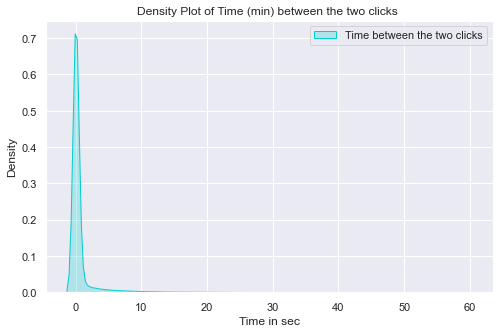

In [43]:
#Plot Time difference < 60 mins

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['time_diff_sec'] <= pd.Timedelta(60,'m')]['time_diff_sec'].dt.components['minutes'], color="darkturquoise", shade=True)
plt.legend(['Time between the two clicks'])
plt.title('Density Plot of Time (min) between the two clicks ')
plt.xlabel('Time in min')
plt.show()

We can see that the most common time difference between the two clicks is < 60 sec

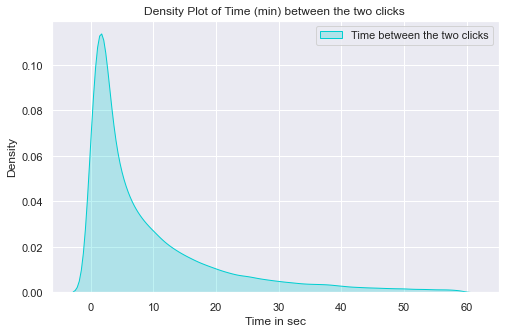

In [44]:
#Plot Time difference < 60 mins

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['time_diff_sec'] <= pd.Timedelta(60,'s')]['time_diff_sec'].dt.components['seconds'], color="darkturquoise", shade=True)
plt.legend(['Time between the two clicks'])
plt.title('Density Plot of Time (sec) between the two clicks ')
plt.xlabel('Time in sec')
plt.show()

    The Time difference indicates Duplicate rows which might be caused due to:
    
    1. website redirecting creates additional touchpoints within a short timeframe (< 1 minute).
    2. user click on the campaign link within a short timeframe (< 1 minute).

---

# <span style="color:#00008B"> Change 1 </span>

## <span style="color:#4682B4"> referred_to_url </span>  

In [122]:
df[df['user_analytics_id']=='000ddd7a158043beac42f14d418cd574']['referred_to_url'].unique()

array(['/thebalance-life-aig', '/thebalance-life-aig/'], dtype=object)

We can see below that these users have different Referred URL's with in the same session. 

In [123]:
df['referred_to_url'] = df['referred_to_url'].astype('str')
df['referred_to_url'] = df['referred_to_url'].apply(lambda x: x + '/' if not x.endswith('/') else x)

    To solve: we could add ‘/’ at the end of the string if not already present.

In [124]:
df[df['user_analytics_id']=='000ddd7a158043beac42f14d418cd574']['referred_to_url'].unique()

array(['/thebalance-life-aig/'], dtype=object)

# <span style="color:#00008B"> Change 2 </span>

Currently, the product_visited column is created from referred_to_url as mentioned below:

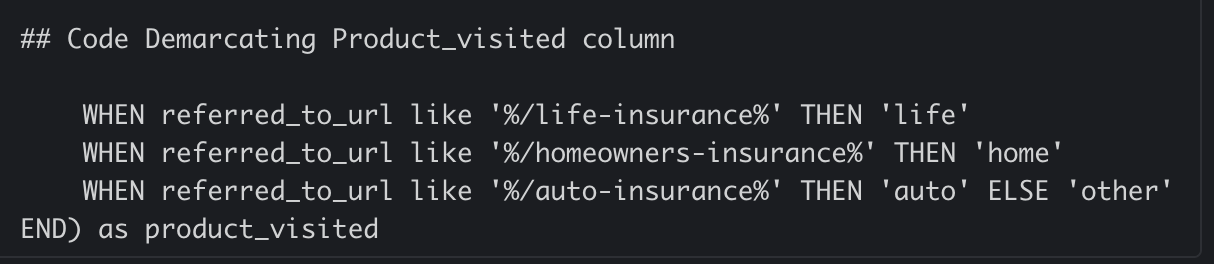

In [54]:
#Import library
from IPython.display import Image

# Load image from local storage
Image(filename = "../code.png", width = 600, height = 300)

## <span style="color:#4682B4"> product_visited </span>

In [55]:
df[df['product_visited'] == 'life']['referred_to_url'].unique()

array(['/life-insurance/fbtp/', '/life-insurance/application',
       '/life-insurance/no-zip-mlp-1', ...,
       '/autologin/BAh7CDoMdXNlcl9pZGkE7q%252BbAToQcmVkaXJlY3RfdG8wOg9leHBpcmVzX2F0VTogQWN0aXZlU3VwcG9ydDo6VGltZVdpdGhab25lWwhJdToJVGltZQ12Ch7ApiBWoAk6CXpvbmVJIghVVEMGOgZFRjoNbmFub19udW1pAngDOg1uYW5vX2RlbmkGOg1zdWJtaWNybyIHiIBJIghVVEMGOwtUQAo%253D--27d88df159d76d9a98a262ba445f6529b314c58f/r/life-insurance/signatures/security-questions/ac1d7bf5-0b6f-49bd-a472-6eb6263c3621',
       '/life-insurance/signatures/security-questions/9d028f15-4501-487e-aaaf-e6747b64e013',
       '/life-insurance/signatures/basics-confirmation/af92067d-835c-41b1-b030-b3fc1ba83626'],
      dtype=object)

    Let us identify the referred_to_url that contains the word "life" but is not categorized as life in the product visited column

In [56]:
product_visited_df = pd.DataFrame(df[(df['referred_to_url'].str.contains("life", na=False)) & (df['product_visited'] != 'life')][['referred_to_url','product_visited']]\
             .groupby(['product_visited'])['referred_to_url'].unique()).reset_index()



product_visited_df

,product_visited,referred_to_url
0,auto,[/auto-insurance/reviews/metlife/]
1,home,"[/homeowners-insurance/reviews/metlife/, /home..."
2,other,[/awareness-5-tips-for-spouses-shopping-for-li...


In [71]:
print("auto: ", len(list(product_visited_df[product_visited_df['product_visited'] == 'auto']['referred_to_url'][0])))
print("home: ", len( list(product_visited_df[product_visited_df['product_visited'] == 'home']['referred_to_url'][1])))
print("other: ", len( list(product_visited_df[product_visited_df['product_visited'] == 'other']['referred_to_url'][2])))

auto:  1
home:  3
other:  15149


**product_visited = auto**

Check unique referred_to_url for product visited 'auto'

In [72]:
product_visited_df[product_visited_df['product_visited']== 'auto']['referred_to_url'][0].tolist()

['/auto-insurance/reviews/metlife/']

**product_visited = home**

Check unique referred_to_url for product visited 'home'

In [73]:
product_visited_df[product_visited_df['product_visited']== 'home']['referred_to_url'][1].tolist()

['/homeowners-insurance/reviews/metlife/',
 '/homeowners-insurance/home-insurance-vs-life-insurance/',
 '/homeowners-insurance/home-insurance-vs-life-insurance']

**product_visited = other**

Check unique referred_to_url for product visited 'auto'

- /umbrella/v1/gold-rush/lincoln-national-life/
- /blog/new-parent-additional-life-insurance/
- /investopedia-life-protective
- /blog/is-pet-life-insurance-worth-it/
- /creditkarma-life/
- /nerdwallet-life/
- /blog/what-happens-when-youre-owed-life-insurance-money-dont-know-it/

**life insurance related**
- /policy-center/life/confirmation
- /bestowlife
- /policy-center/life
- /physicianonfirelife/

**non-life insurance related**
- /defrancolife/
- /whatsinsidelife/



##### Note 1:
- If we categorized URLs that contain the word “life” we can increase the TP & FP equally. 


- Alternative: If we categorized URLs that contain the word “-life” we can increase the TP. 



##### Note 1:

- If we plan to categorize URLs that contain the word “life”, we have to make sure that it is not already categorized into auto / home / life. 


- In other words, it should be only applied where the product_visited is **NULL (OTHERS)**

In [ ]:
#product_visited_df[product_visited_df['product_visited']== 'other']['referred_to_url'][2].tolist()

#### <span style="color:black"> Replace product_visited = Life </span>

In [74]:
df.loc[(df['referred_to_url'].str.contains("-life", na=False)) & (df['product_visited'] == 'other'), 'product_visited'] = 'life'

------

# <span style="color:#00008B"> Change 3 </span>

# <span style="color:#4682B4"> Duplicates </span>

    Let us analyze the rows with less than 60 sec time difference

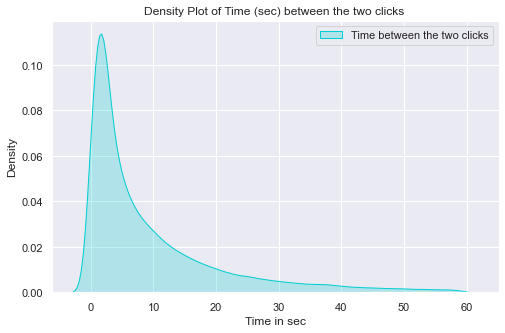

In [77]:
#Plot Time difference < 60 mins

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['time_diff_sec'] <= pd.Timedelta(60,'s')]['time_diff_sec'].dt.components['seconds'], color="darkturquoise", shade=True)
plt.legend(['Time between the two clicks'])
plt.title('Density Plot of Time (sec) between the two clicks ')
plt.xlabel('Time in sec')
plt.show()

        Plot the number of times the user visited the site within 60 seconds. 

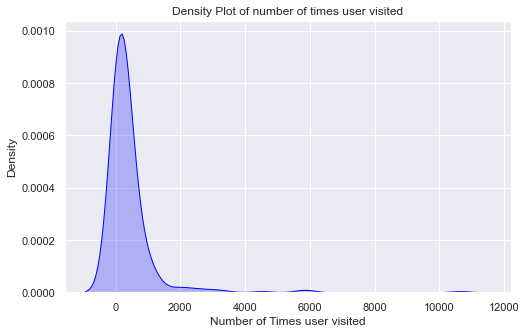

In [80]:
#Plot Time difference < 5 mins

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['time_diff_sec'] <= pd.Timedelta(60,'s')].user_analytics_id.value_counts().unique(), color="blue", shade=True)
#plt.legend(['Number of times user visited'])
plt.title('Density Plot of number of times user visited')
plt.xlabel('Number of Times user visited')
plt.show()

-------

## <span style="color:#4682B4"> Create Sessions </span>

A session is a group of user interactions with your website that take place within a given time frame (a single session can contain multiple page views)

We are following two methods by which a session ends:

- Time-based expiration:
    - After 30 minutes of inactivity
    - At midnight
    
    
- Campaign change:
    - If a user arrives via one campaign, leaves, and then comes back via a different campaign.
    
    
    
A single user can open multiple sessions. Those sessions can occur on the same day, or over several days, weeks, or months. As soon as one session ends, there is then an opportunity to start a new session. 

In [94]:
# Sorting is needed, otherwise .diff() will output wrong results
df.sort_values(['user_analytics_id', 'created_at'], inplace=True)

# Timestamp diff in seconds
diff_timestamp = df.groupby(['user_analytics_id', 'Date'])['created_at'].diff()

# indexes where new session_id will be created
new_session = (diff_timestamp.isnull()) | (diff_timestamp >= pd.Timedelta(30, 'm'))

# Create unique session_id for every user
df['session_id'] = df.loc[new_session, ['user_analytics_id', 'created_at']] \
    .groupby('user_analytics_id').rank(method='first').astype(int)

# Propagate last valid observation forward (replace NaN)
df['session_id'] = df['session_id'].fillna(method='ffill').astype(int)


In [3]:
import pandas as pd
df = pd.read_csv("Created_30mSessions.csv")
df.drop('Unnamed: 0',axis=1 , inplace=True)

## <span style="color:#4682B4"> Analysis  </span>    

## <span style="color:#4682B4"> Example 1  </span>    
    USER: e92e0324865f41ae85c1feda74f566f6

In [101]:
data = df[df['user_analytics_id']== 'e92e0324865f41ae85c1feda74f566f6']
data[['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']].reset_index(drop=True)[:20]

,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
0,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/top10-life/index.html/,Partnerships,life,11:36:17,2020-09-17,1
1,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/autologin/BAh7CDoMdXNlcl9pZGkEp%252F8YAjoQcmV...,Email,life,12:02:13,2020-10-02,2
2,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:04:49,2020-10-02,2
3,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:04:55,2020-10-02,2
4,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:05:11,2020-10-02,2
5,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:07:05,2020-10-02,2
6,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:14:47,2020-10-02,2
7,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:25:59,2020-10-02,2
8,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:37:30,2020-10-02,2
9,e92e0324865f41ae85c1feda74f566f6,Mozilla/5.0 (Linux; Android 8.1.0; LML211BL) A...,/life-insurance/comparison/,Email,life,12:38:17,2020-10-02,2


---------

## <span style="color:#4682B4"> Example 2 </span>    
    USER: 1d9a49b7cd79499da2eecbfcc932209e

    Note: Here, Session 3: has different “referred_to_url” source

In [115]:
data = df[df['user_analytics_id']== '1d9a49b7cd79499da2eecbfcc932209e']
data[data['session_id']==3][['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']].reset_index(drop=True)[0:5]

,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
0,1d9a49b7cd79499da2eecbfcc932209e,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,/autologin/BAh7CDoMdXNlcl9pZGkE%252B%252B38ATo...,Email,life,20:07:27,2020-09-23,3
1,1d9a49b7cd79499da2eecbfcc932209e,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,/life-insurance/comparison/,Email,life,20:07:42,2020-09-23,3
2,1d9a49b7cd79499da2eecbfcc932209e,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,/life-insurance/comparison/,Email,life,20:07:45,2020-09-23,3
3,1d9a49b7cd79499da2eecbfcc932209e,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,/life-insurance/comparison/,Email,life,20:07:48,2020-09-23,3
4,1d9a49b7cd79499da2eecbfcc932209e,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,/life-insurance/comparison/,Email,life,20:08:28,2020-09-23,3


-------

## <span style="color:#4682B4"> Example 3 </span>    
    USER: 05b42d0620e1422486a5db58b5849db2
      
    There is hardly any difference between the two sessions

In [102]:
data = df[df['user_analytics_id']== '05b42d0620e1422486a5db58b5849db2']
data = data[data['session_id']==1].reset_index(drop=True)

len(data)

1100

In [106]:
df[df['user_analytics_id']== '05b42d0620e1422486a5db58b5849db2'][['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']][1099:1101].reset_index(drop=True)

,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
0,05b42d0620e1422486a5db58b5849db2,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/life-insurance/comparison/,Email,life,23:59:56,2020-10-03,1
1,05b42d0620e1422486a5db58b5849db2,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/life-insurance/comparison/,Email,life,00:00:08,2020-10-04,2


    Extended over period of 1 day

In [246]:
df[df['user_analytics_id']== '05b42d0620e1422486a5db58b5849db2'][1099:1100][['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']]

,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
62363,05b42d0620e1422486a5db58b5849db2,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/life-insurance/comparison,Email,life,23:59:56,2020-10-03,1


In [247]:
df[df['user_analytics_id']== '05b42d0620e1422486a5db58b5849db2'][1100:1101][['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']]


,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
62364,05b42d0620e1422486a5db58b5849db2,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/life-insurance/comparison,Email,life,00:00:08,2020-10-04,2


## <span style="color:#4682B4"> Example 4 </span>    
    USER: 05b42d0620e1422486a5db58b5849db2
    
    There are 1100 records in Session 1

In [126]:
data = df[df['user_analytics_id']== '05b42d0620e1422486a5db58b5849db2']
data = data[data['session_id']==1].reset_index(drop=True)

In [129]:
data[0:1][['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']]


,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
0,05b42d0620e1422486a5db58b5849db2,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/life-insurance/comparison/,Email,life,21:29:05,2020-10-03,1


In [131]:
data[-1:][['user_analytics_id', 'user_agent', 'referred_to_url', 'visitor_source','product_visited', 'Time', 'Date','session_id']]

,user_analytics_id,user_agent,referred_to_url,visitor_source,product_visited,Time,Date,session_id
1099,05b42d0620e1422486a5db58b5849db2,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/life-insurance/comparison/,Email,life,23:59:56,2020-10-03,1


-----

---------